## Начало лабораторной работы №2

Цены на мобильные телефоны

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

In [1]:
import pandas as pd
data = pd.read_csv("../static/csv/mobile phone price prediction.csv",delimiter=',')
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')


Проблема область: Данные о мобильных телефонах, включая их характеристику.\
Объект наблюдения: Мобильные телефоны.\
Атрибуты: Имя, рейтинг, оценка, поддержка двух SIM-карт, оперативная память, аккумулятор, дисплей, камера, внешняя память, версия Android телефона, цена, компания производителя, разрешение экрана, харатеристика процессора, название процессора.\
Пример бизнес-цели: 
1. Анализ данных: Изучение и очистка данных для выявления закономерностей и корреляций между характеристиками мобильных телефонов и их ценами.
2. Разработка модели: Создание и обучение модели машинного обучения, которая будет прогнозировать цены на мобильные телефоны на основе их характеристик.
3. Внедрение: Интеграция модели в систему ценообразования компании для автоматического расчета цен на мобильные телефоны.


Актуальность: Данный датасет является актуальным и ценным ресурсом для компаний, занимающихся продажей мобильных телефонов, а также для исследователей и инвесторов, поскольку он предоставляет обширную информацию о ценах и характеристиках мобильных телефонов на вторичном рынке. Эти данные могут быть использованы для разработки моделей прогнозирования цен, анализа рыночных тенденций и принятия обоснованных бизнес-решений.

<Axes: xlabel='Spec_score', ylabel='Price'>

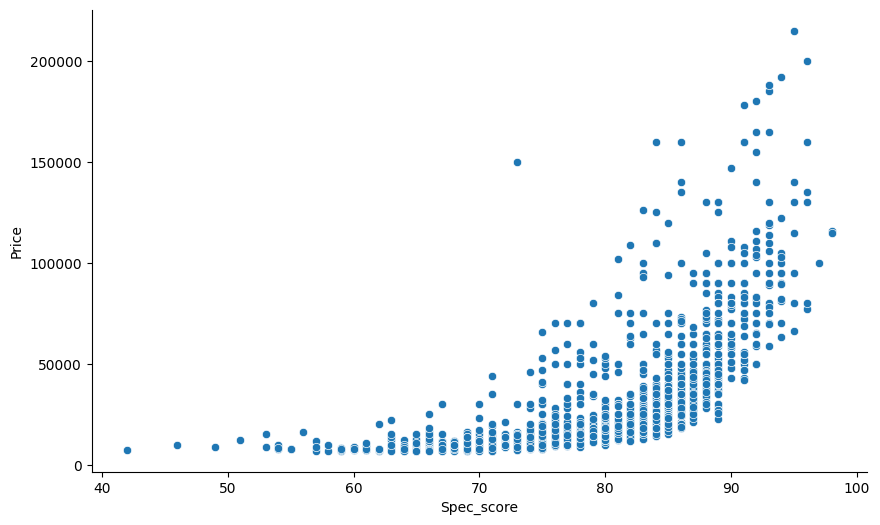

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("../static/csv/mobile phone price prediction.csv",delimiter=',')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['Price'] = data['Price'].str.replace(',', '').astype(float)
data.describe(include='all')
f, ax = plt.subplots(figsize=(10,6))
sns.despine(f)
sns.scatterplot(data=data, x='Spec_score', y='Price')

При проверке на шум можно заметить выброс в 75 оценке. Цена там запредельная.

Для удаления выбросов из датасета можно использовать метод межквартильного размаха. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

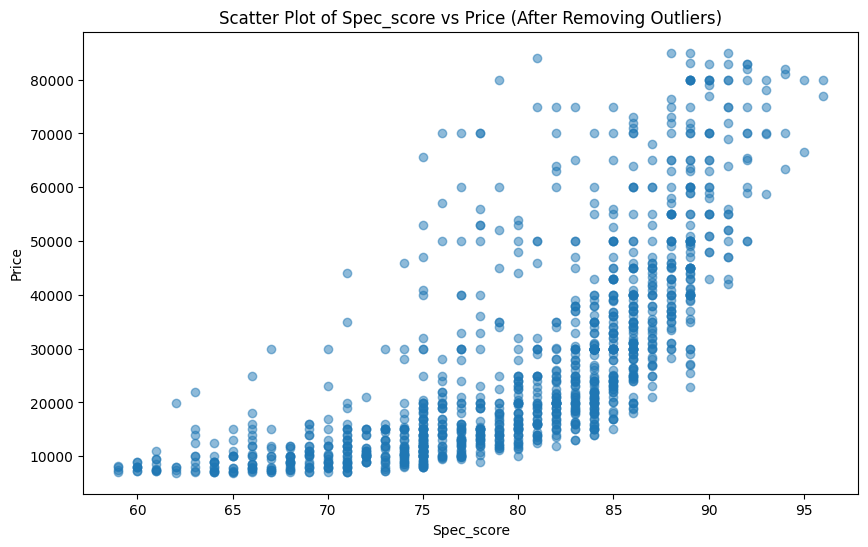

Количество строк до удаления выбросов: 1370
Количество строк после удаления выбросов: 1256


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

df['Spec_score'] = df['Spec_score'].astype(int)
df['Price'] = df['Price'].str.replace(',', '').astype(float)
# Выбор столбцов для анализа
column1 = 'Spec_score'
column2 = 'Price'


# Функция для удаления выбросов
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для каждого столбца
df_cleaned = df.copy()
for column in [column1, column2]:
    df_cleaned = remove_outliers(df_cleaned, column)

# Построение точечной диаграммы после удаления выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[column1], df_cleaned[column2], alpha=0.5)
plt.xlabel(column1)
plt.ylabel(column2)
plt.title(f'Scatter Plot of {column1} vs {column2} (After Removing Outliers)')
plt.show()

# Вывод количества строк до и после удаления выбросов
print(f"Количество строк до удаления выбросов: {len(df)}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

Теперь очистим датасет от пустых строк

In [48]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("..//static//csv//mobile phone price prediction.csv")

# Вывод общей информации о датасете
print("Общая информация о датасете:")
print(df.info())

# Вывод общей информации о датасете
print("Общая информация о датасете:")
print(df.info())

# Вывод таблицы анализа пропущенных значений
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Количество пропущенных значений', 'Процент пропущенных значений'])

print("\nТаблица анализа пропущенных значений:")
print(missing_data)



Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    927 non-null    object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1351 non-null   object 
 14  fast_charging      1281 non-null   object 
 15  Screen_resolution  1368 non-null   object 


In [8]:
df.dropna(inplace=True)

print(df.shape)

print(df.isnull().any())

(817, 18)
Unnamed: 0           False
Name                 False
Rating               False
Spec_score           False
No_of_sim            False
Ram                  False
Battery              False
Display              False
Camera               False
External_Memory      False
Android_version      False
Price                False
company              False
Inbuilt_memory       False
fast_charging        False
Screen_resolution    False
Processor            False
Processor_name       False
dtype: bool


Создадим выборки.

In [ ]:
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 822
Размер контрольной выборки: 274
Размер тестовой выборки: 274


Проанализируем сбалансированность выборки

In [28]:
def check_balance(df, name):
    counts = df['company'].value_counts()
    print(f"Распределение company в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")


Распределение company в обучающей выборке:
company
Vivo        118
Realme      111
Samsung      98
Motorola     77
Xiaomi       56
Honor        54
Poco         45
Huawei       43
OnePlus      43
iQOO         29
OPPO         24
Oppo         19
Lava         15
TCL          13
Google       13
POCO         11
Lenovo       10
itel          9
Asus          9
Tecno         7
LG            5
Nothing       5
Gionee        5
Itel          2
Coolpad       1
Name: count, dtype: int64

Распределение company в контрольной выборке:
company
Samsung     44
Vivo        36
Realme      35
Motorola    26
Xiaomi      20
OnePlus     17
iQOO        17
Honor       16
Poco        13
Huawei       9
Google       6
OPPO         5
Nothing      5
POCO         4
Asus         4
TCL          4
itel         3
Oppo         3
Lenovo       2
Lava         2
Tecno        2
IQOO         1
Name: count, dtype: int64

Распределение company в тестовой выборке:
company
Realme      40
Samsung     39
Vivo        32
Motorola    24
Ho

Выборки не сбалансированы, и для улучшения качества модели рекомендуется провести аугментацию данных.

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Разделение на обучающую и тестовую выборки
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

def check_balance(df, name):
    counts = df['company'].value_counts()
    print(f"Распределение company в {name}:")
    print(counts)
    print()

def oversample(df):
    X = df.drop('company', axis=1)
    y = df['company']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")
check_balance(val_df_oversampled, "контрольной выборке после oversampling")
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

def undersample(df):
    X = df.drop('company', axis=1)
    y = df['company']
    
    undersampler = RandomUnderSampler(random_state=42) # type: ignore
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")
check_balance(val_df_undersampled, "контрольной выборке после undersampling")
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение company в обучающей выборке после oversampling:
company
TCL         118
Vivo        118
Realme      118
Samsung     118
Huawei      118
LG          118
POCO        118
Xiaomi      118
Motorola    118
Honor       118
Poco        118
Lava        118
OPPO        118
Tecno       118
OnePlus     118
Oppo        118
Asus        118
iQOO        118
Google      118
itel        118
Lenovo      118
Nothing     118
Gionee      118
Itel        118
Coolpad     118
Name: count, dtype: int64

Распределение company в контрольной выборке после oversampling:
company
Xiaomi      44
Motorola    44
Honor       44
Samsung     44
OnePlus     44
Vivo        44
iQOO        44
Nothing     44
Lenovo      44
Realme      44
Poco        44
Oppo        44
OPPO        44
Huawei      44
Google      44
POCO        44
Lava        44
itel        44
TCL         44
Tecno       44
Asus        44
IQOO        44
Name: count, dtype: int64

Распределение company в тестовой выборке после oversampling:
company
iQOO 

## Цены на автомобили


In [29]:
import pandas as pd
df = pd.read_csv("..//static//csv//car_price_prediction.csv")
print(df.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


Проблемная область: Данные о ценах на автомобили, включая их характеристики

Объект наблюдения: автомобиль

Атрибуты: идентификатор, цена, налог, производитель, модель, год производства, категория, наличие кожаного салона, тип топлива, объем двигателя, пробег автомобиля, количество цилиндров в двигателе, тип коробки передач, тип привода, количество дверей, расположение руля, цвет, количество подушек безопасностей.

Пример бизнес-цели: 
1. Анализ данных: Изучение и очистка данных для выявления закономерностей и корреляций между характеристиками автомобилей и их ценами.
2. Разработка модели: Создание и обучение модели машинного обучения, которая будет прогнозировать цены на автомобили на основе их характеристик.
3. Внедрение: Интеграция модели в систему ценообразования компании для автоматического расчета цен на автомобили.


Актуальность: Данный датасет является актуальным и ценным ресурсом для компаний, занимающихся продажей автомобилей, а также для исследователей и инвесторов, поскольку он предоставляет обширную информацию о ценах и характеристиках автомобилей на вторичном рынке. Эти данные могут быть использованы для разработки моделей прогнозирования цен, анализа рыночных тенденций и принятия обоснованных бизнес-решений.

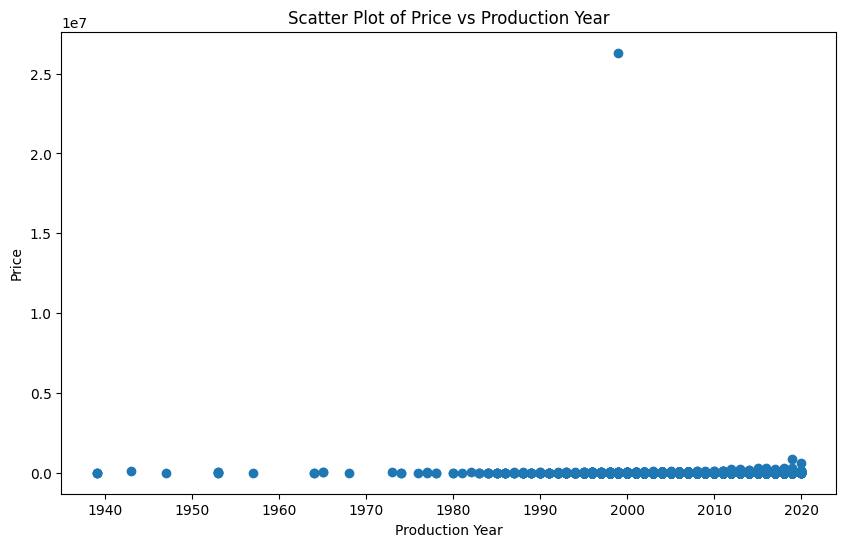

In [33]:
import matplotlib.pyplot as plt

# Преобразуем год производства в целочисленный тип
df['Prod. year'] = df['Prod. year'].astype(int)

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(df['Prod. year'], df['Price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Production Year')
plt.show()

Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

Выбросы:
             ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
41     45797488  45734  1091      HYUNDAI        H1        2016  Universal   
72     45797480  43952  1249      HYUNDAI        H1        2017  Universal   
75     45624039  42337     -         FORD   Mustang        2016  Cabriolet   
112    45731735  44752  1091      HYUNDAI        H1        2016  Universal   
172    45802937  43880   891      HYUNDAI  Santa FE        2016       Jeep   
...         ...    ...   ...          ...       ...         ...        ...   
19000  45646433  43278  1514        LEXUS    GX 460        2011       Jeep   
19056  45802290  44843  1091      HYUNDAI        H1        2016  Universal   
19089  45810098  44611   891        HONDA     Civic        2016      Sedan   
19136  45731793  41811  1249      HYUNDAI        H1        2017  Universal   
19175  45804283  42883   900         JEEP   Compass        2015       Jeep   

      Leather interior Fuel type Engine volume    Mile

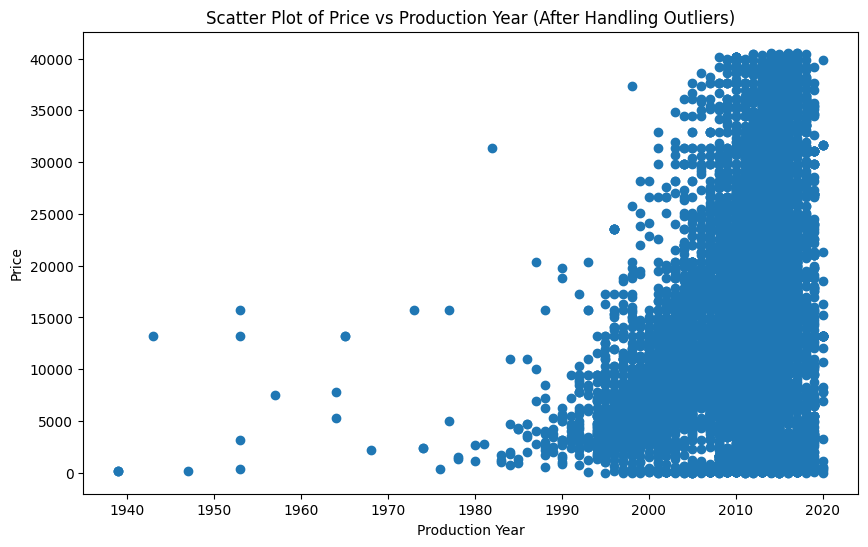

In [35]:
# Преобразуем год производства в целочисленный тип
df['Prod. year'] = df['Prod. year'].astype(int)

# Статистический анализ для определения выбросов
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Определение порога для выбросов
threshold = 1.5 * IQR
outliers = (df['Price'] < (Q1 - threshold)) | (df['Price'] > (Q3 + threshold))

# Вывод выбросов
print("Выбросы:")
print(df[outliers])

# Обработка выбросов
# В данном случае мы заменим выбросы на медианное значение
median_price = df['Price'].median()
df.loc[outliers, 'Price'] = median_price

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df['Prod. year'], df['Price'])
plt.xlabel('Production Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Production Year (After Handling Outliers)')
plt.show()

Смртрем, есть ли пропущенные значения. Пропущенных данных  не обнаружено.

In [36]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64



Теперь создадим выборки.


In [5]:
# Загрузка данных
df = pd.read_csv("..//static//csv//car_price_prediction.csv")

# Разделение данных на обучающую и временную выборки
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv("..//static//csv//train_data.csv", index=False)
val_df.to_csv("..//static//csv//val_data.csv", index=False)
test_df.to_csv("..//static//csv//test_data.csv", index=False)

Размер обучающей выборки: 11542
Размер контрольной выборки: 3847
Размер тестовой выборки: 3848


Проанализируем сбалансированность выборки.

In [6]:
train_df = pd.read_csv("..//static//csv//train_data.csv")
val_df = pd.read_csv("..//static//csv//val_data.csv")
test_df = pd.read_csv("..//static//csv//test_data.csv")

# Оценка сбалансированности
def check_balance(df, name):
    counts = df['Category'].value_counts()
    print(f"Распределение Category в {name}:")
    print(counts)
    print(f"Процент автомобилей категории 'Седан': {counts['Sedan'] / len(df) * 100:.2f}%")
    print(f"Процент автомобилей категории 'Джип': {counts['Jeep'] / len(df) * 100:.2f}%")
    print()

# Определение необходимости аугментации данных
def need_augmentation(df):
    counts = df['Category'].value_counts()
    ratio = counts['Sedan'] / counts['Jeep']
    if ratio > 1.5 or ratio < 0.67:
        print("Необходима аугментация данных для балансировки классов.")
    else:
        print("Аугментация данных не требуется.")
        
check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

need_augmentation(train_df)
need_augmentation(val_df)
need_augmentation(test_df)

Распределение Category в обучающей выборке:
Category
Sedan          5289
Jeep           3246
Hatchback      1684
Minivan         396
Coupe           318
Universal       216
Microbus        184
Goods wagon     151
Pickup           31
Cabriolet        20
Limousine         7
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 45.82%
Процент автомобилей категории 'Джип': 28.12%

Распределение Category в контрольной выборке:
Category
Sedan          1697
Jeep           1109
Hatchback       608
Minivan         129
Coupe           105
Universal        73
Microbus         57
Goods wagon      42
Pickup           17
Cabriolet         9
Limousine         1
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 44.11%
Процент автомобилей категории 'Джип': 28.83%

Распределение Category в тестовой выборке:
Category
Sedan          1750
Jeep           1118
Hatchback       555
Minivan         122
Coupe           109
Universal        75
Microbus         65
Goods wagon      40
Cabr

По результатам анализа требуется приращение.

In [10]:

# Загрузка данных
train_df = pd.read_csv("..//static//csv//train_data.csv")
val_df = pd.read_csv("..//static//csv//val_data.csv")
test_df = pd.read_csv("..//static//csv//test_data.csv")

# Преобразование категориальных признаков в числовые
def encode(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        if column != 'Category':  # Пропускаем целевую переменную
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    return label_encoders

# Преобразование целевой переменной в числовые значения
def encode_target(df):
    le = LabelEncoder()
    df['Category'] = le.fit_transform(df['Category'])
    return le

# Применение кодирования
label_encoders = encode(train_df)
encode(val_df)
encode(test_df)

# Кодирование целевой переменной
le_target = encode_target(train_df)
encode_target(val_df)
encode_target(test_df)

# Проверка типов данных
def check_data_types(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Столбец '{column}' содержит строковые данные.")

check_data_types(train_df)
check_data_types(val_df)
check_data_types(test_df)

# Функция для выполнения oversampling
def oversample(df):
    if 'Category' not in df.columns:
        print("Столбец 'Category' отсутствует.")
        return df
    
    X = df.drop('Category', axis=1)
    y = df['Category']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

# Функция для выполнения undersampling
def undersample(df):
    if 'Category' not in df.columns:
        print("Столбец 'Category' отсутствует.")
        return df
    
    X = df.drop('Category', axis=1)
    y = df['Category']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

# Применение oversampling и undersampling к каждой выборке
train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

# Обратное преобразование целевой переменной в строковые метки
def decode_target(df, le_target):
    df['Category'] = le_target.inverse_transform(df['Category'])

decode_target(train_df_oversampled, le_target)
decode_target(val_df_oversampled, le_target)
decode_target(test_df_oversampled, le_target)

decode_target(train_df_undersampled, le_target)
decode_target(val_df_undersampled, le_target)
decode_target(test_df_undersampled, le_target)

# Проверка результатов
def check_balance(df, name):
    if 'Category' not in df.columns:
        print(f"Столбец 'Category' отсутствует в {name}.")
        return
    
    counts = df['Category'].value_counts()
    print(f"Распределение Category в {name}:")
    print(counts)
    
    if 'Sedan' in counts and 'Jeep' in counts:
        print(f"Процент автомобилей категории 'Седан': {counts['Sedan'] / len(df) * 100:.2f}%")
        print(f"Процент автомобилей категории 'Джип': {counts['Jeep'] / len(df) * 100:.2f}%")
    else:
        print("Отсутствуют одна или обе категории (Седан/Внедорожник).")
    print()

# Проверка сбалансированности после oversampling
print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

# Проверка сбалансированности после undersampling
print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение Category в обучающей выборке:
Category
Jeep           5289
Hatchback      5289
Sedan          5289
Goods wagon    5289
Cabriolet      5289
Universal      5289
Minivan        5289
Microbus       5289
Coupe          5289
Pickup         5289
Limousine      5289
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 9.09%
Процент автомобилей категории 'Джип': 9.09%

Распределение Category в контрольной выборке:
Category
Jeep           1697
Sedan          1697
Minivan        1697
Coupe          1697
Hatchback      1697
Goods wagon    1697
Universal      1697
Microbus       1697
Pickup         1697
Cabriolet      1697
Limousine      1697
Name: count, dtype: int64
Процент автомобилей категории 'Седан': 9.09%
Процент автомобилей категории 'Джип': 9.09%

Распределение Category в тестовой выборке:
Category
Jeep           1750
Hatchback      1750
Sedan          1750
Coupe          1750
Minivan        1750
Goods wagon    1750
Microbus       1750
Universal     

## Цены на кофе

In [11]:
import pandas as pd
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Проблемная область: Данные о ценах на акции кофе Starbucks Corporation.

Объект наблюдения: цены на акции кофе.

Атрибуты:  дата , цена открытия , самая высокая цена дня, самая низкая цена дня, цена закрытия , скорректированная цена закрытия и объем торгов.

Пример бизнес-цели: 
1. Анализ данных: Изучение и очистка данных для выявления закономерностей и корреляций между объёмом торгов и цены на акции кофе Starbucks Corporation.
2. Разработка модели: Создание и обучение модели машинного обучения, которая будет прогнозировать цены на акции кофе Starbucks Corporation.
3. Внедрение: Интеграция модели в систему ценообразования компании для автоматического расчета цен на акции кофе.


Актуальность:Эти данные бесценны для проведения исторического анализа , прогнозирования будущей динамики акций и понимания рыночных тенденций, связанных с акциями Starbucks.

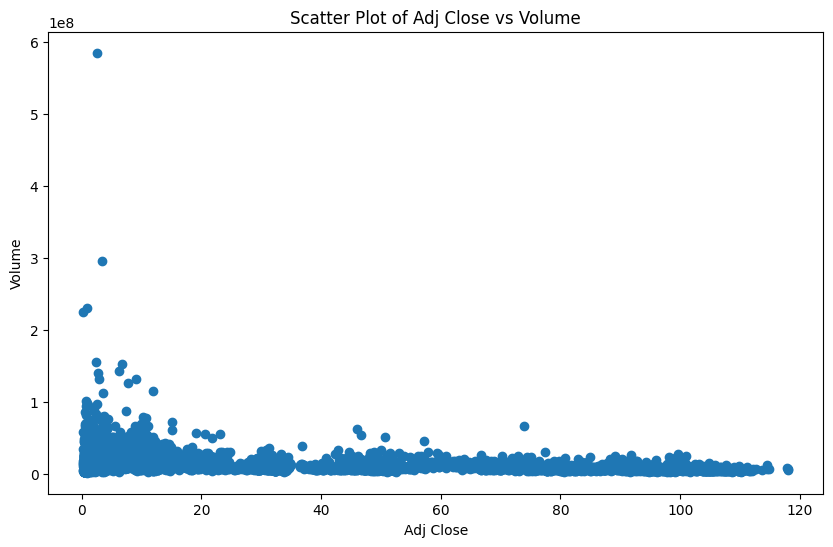

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['Adj Close'], df['Volume'])
plt.xlabel('Adj Close')
plt.ylabel('Volume')
plt.title('Scatter Plot of Adj Close vs Volume')
plt.show()

Выброс присутствует. Сделаем очистку данных.

Для удаления выбросов из датасета можно использовать метод межквартильного размаха. Зашумленность не очень высокая. Покрытие данных высокое и подошло бы для поставленной задачи по актуальности.

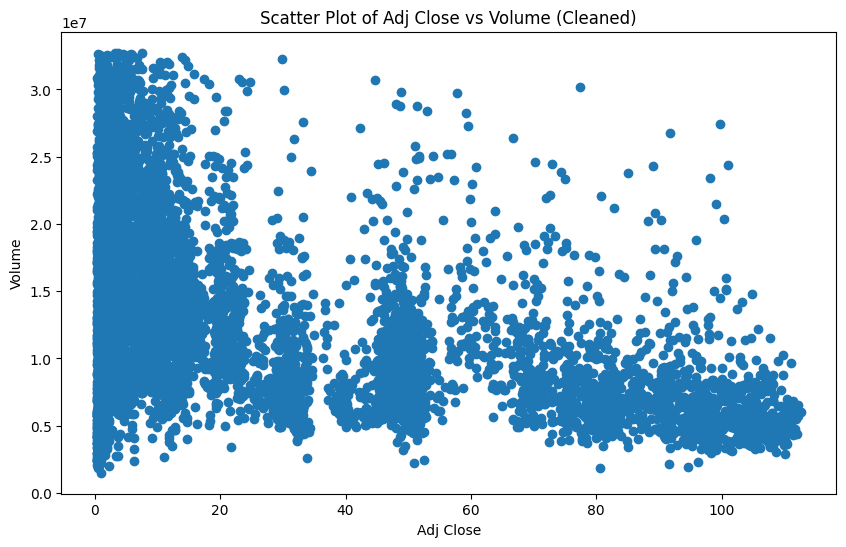

In [20]:
# Загрузка данных
df = pd.read_csv("..//static//csv//Starbucks Dataset.csv")

# Функция для удаления выбросов с использованием IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для столбцов 'Adj Close' и 'Volume'
df_cleaned = remove_outliers_iqr(df, 'Adj Close')
df_cleaned = remove_outliers_iqr(df_cleaned, 'Volume')

# Построение графика для очищенных данных
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Adj Close'], df_cleaned['Volume'])
plt.xlabel('Adj Close')
plt.ylabel('Volume')
plt.title('Scatter Plot of Adj Close vs Volume (Cleaned)')
plt.show()

Теперь посмотрим, если пустые значения. Пустых значений не оказалось.

In [19]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()





Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool



Теперь создадим выборки.

In [26]:

# Выбор признаков и целевой переменной
X = df.drop('Volume', axis=1)  # Признаки (все столбцы, кроме 'volume')
y = df['Volume']  # Целевая переменная ('volume')

# Разбиение данных на обучающую и оставшуюся часть (контрольную + тестовую)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер контрольной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

Размер обучающей выборки: 4821
Размер контрольной выборки: 1607
Размер тестовой выборки: 1608


Проанализируем сбалансированность выборки.

In [ ]:

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение Price в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")
    print("\nНеобходима аугментация данных для балансировки классов.\n")

# Анализ распределения для каждой выборки
analyze_distribution(y_train, "обучающей выборке")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Price в обучающей выборке:
Volume
1847800      1
1875200      1
1910400      1
1949200      1
2019200      1
            ..
143464800    1
152007800    1
230883200    1
295411200    1
585508800    1
Name: count, Length: 4697, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в контрольной выборке:
Volume
2380800      1
2407200      1
2412800      1
2547200      1
2659200      1
            ..
85356800     1
87072000     1
111773600    1
114960000    1
155107200    1
Name: count, Length: 1593, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%

Необходима аугментация данных для балансировки классов.

Распределение Price в тестовой выборке:
Volume
1504000      1
2011200      1
2073600      1
2169700      1
2432000      1
            ..
67067400     1
75863200     1
81587200     1
131420600    1
224358400    1
Name: co

Выборка недостаточно сбалансирована. Выполним аугментацию данных.

In [27]:
# Применение oversampling к обучающей выборке
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Функция для анализа распределения и вывода результатов
def analyze_distribution(data, title):
    print(f"Распределение Volume в {title}:")
    distribution = data.value_counts().sort_index()
    print(distribution)
    total = len(data)
    positive_count = (data > 0).sum()
    negative_count = (data < 0).sum()
    positive_percent = (positive_count / total) * 100
    negative_percent = (negative_count / total) * 100
    print(f"Процент положительных значений: {positive_percent:.2f}%")
    print(f"Процент отрицательных значений: {negative_percent:.2f}%")

# Анализ распределения для каждой выборки
analyze_distribution(y_train_resampled, "обучающей выборке после oversampling")
analyze_distribution(y_val, "контрольной выборке")
analyze_distribution(y_test, "тестовой выборке")

Распределение Volume в обучающей выборке после oversampling:
Volume
1847800      3
1875200      3
1910400      3
1949200      3
2019200      3
            ..
143464800    3
152007800    3
230883200    3
295411200    3
585508800    3
Name: count, Length: 4697, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение Volume в контрольной выборке:
Volume
2380800      1
2407200      1
2412800      1
2547200      1
2659200      1
            ..
85356800     1
87072000     1
111773600    1
114960000    1
155107200    1
Name: count, Length: 1593, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных значений: 0.00%
Распределение Volume в тестовой выборке:
Volume
1504000      1
2011200      1
2073600      1
2169700      1
2432000      1
            ..
67067400     1
75863200     1
81587200     1
131420600    1
224358400    1
Name: count, Length: 1593, dtype: int64
Процент положительных значений: 100.00%
Процент отрицательных 